In [1]:
import os
import torch
import numpy as np
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as T
import torch.nn.functional as F

from ig_pkg.datasets import get_datasets

from ig_pkg.models.generator import get_model
from ig_pkg.models.classifier import get_classifier
from ig_pkg.models.pretrained_models import get_pretrained_model

from ig_pkg.inputattribs.ig import ig
from ig_pkg.inputattribs.baseline_generator import get_baseline_generator

from ig_pkg.misc import process_heatmap, normalize_tensor, convert_to_img, label_to_class, tran, na_imshow

import time
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from ig_pkg.loss.focal_loss import FocalLoss
from ig_pkg.loss.metrics import ArcMarginProduct, AddMarginProduct
import torchvision.models as models


IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD  = [0.229, 0.224, 0.225]


FGSM

In [ ]:
model = models.resnet18(weights='ResNet18_Weights.DEFAULT')
model.eval()

In [ ]:
import saliency.core as saliency 
from matplotlib import pylab as P

data_path="../../../datasets/ILSVRC2012_val/"

_, valid_datasets = get_datasets("imagenet1k", data_path)
valid_dataloader = torch.utils.data.DataLoader(valid_datasets, batch_size=32, shuffle=True, num_workers=2)


In [4]:
# n02443484: 40 black-footed_ferret
# n01614925: 398 bald_eagle

data_path = '../../../datasets/ILSVRC2012_val/'

ferrot_dir = os.path.join(data_path, 'val', 'n02443484')
ferrot_idx = os.listdir(ferrot_dir)[29]
ferrot_img = Image.open(os.path.join(ferrot_dir, ferrot_idx))

eagle_dir = os.path.join(data_path, 'val', 'n01614925')
eagle_idx = os.listdir(eagle_dir)[1]
eagle_img = Image.open(os.path.join(eagle_dir, eagle_idx))


transform = T.Compose([
    T.Resize(224),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean = IMAGENET_MEAN, std = IMAGENET_STD),
])

ferrot_tensor = transform(ferrot_img)
eagle_tensor = transform(eagle_img)


In [5]:
def fgsm_attack(model, loss, images, labels, eps) :
    
    images = images
    labels = labels
    images.requires_grad = True
            
    outputs = model(images)
    
    model.zero_grad()
    cost = loss(outputs, labels)
    cost.backward()
    
    attack_images = images + eps*images.grad.sign()
    attack_images = torch.clamp(attack_images, 0, 1)
    
    return attack_images

model.eval()
loss = nn.CrossEntropyLoss()
images = ferrot_tensor.unsqueeze(0)
labels = torch.tensor([359])
eps = 0.05

adv = fgsm_attack(model, loss, images, labels, eps)

In [24]:
print(torch.argmax(model(images)))

tensor(359)


In [23]:
for i in range(20):
    i = 0.001 + 0.001 * i
    adv = fgsm_attack(model, loss, images, labels, i)
    print(torch.argmax(model(adv)))

tensor(208)
tensor(208)
tensor(208)
tensor(208)
tensor(208)
tensor(208)
tensor(208)
tensor(208)
tensor(208)
tensor(208)
tensor(208)
tensor(208)
tensor(208)
tensor(208)
tensor(208)
tensor(208)
tensor(208)
tensor(208)
tensor(208)
tensor(208)


In [9]:
model.eval()
loss = nn.CrossEntropyLoss()
images = ferrot_tensor.unsqueeze(0)
labels = torch.tensor([359])
eps = 0.05

images.requires_grad = True
outputs = model(images)
model.zero_grad()
cost = loss(outputs, labels)
cost.backward()
grad_original = images.grad

adv = adv.detach().clone()
adv.requires_grad = True
outputs = model(adv)
model.zero_grad()
cost = loss(outputs, labels)
cost.backward()
grad_adv = adv.grad



In [ ]:
def grad_size(model, loss, images, labels):
    

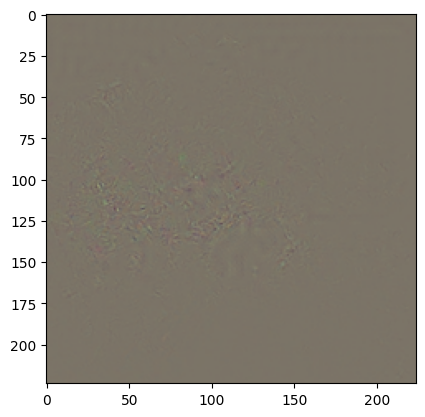

In [14]:
# grad_adv.size()

grad_diff = grad_adv - grad_original

img_diff = convert_to_img(grad_diff.squeeze(0))
plt.imshow(img_diff)

In [17]:
grad_mean = grad_diff.squeeze(0).mean(dim = 0)
print(grad_mean.size())

grad_mean.sum()

torch.Size([224, 224])


tensor(0.2174)

In [ ]:
def fgsm_attack(model, loss, images, labels, eps) :
    
    images = images
    labels = labels
    images.requires_grad = True
            
    outputs = model(images)
    
    model.zero_grad()
    cost = loss(outputs, labels)
    cost.backward()
    
    attack_images = images + eps*images.grad.sign()
    attack_images = torch.clamp(attack_images, 0, 1)
    
    return attack_images

model.eval()
loss = nn.CrossEntropyLoss()
images = ferrot_tensor.unsqueeze(0)
labels = torch.tensor([359])
eps = 0.05

adv = fgsm_attack(model, loss, images, labels, eps)